<a href="https://colab.research.google.com/github/IA-UNISON/IA-UNISON.github.io/blob/main/assets/libretas/intro-pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a `pandas`

**Curso Inteligencia Artificial 2026-1**

Julio Waissman

In [9]:
import pandas as pd

## Creando un dataframe

Pandas es un marco de desarrollo para la manipulación de datos, creado originalmente para ofrecer en python las facilidades de manejo de tablas de datos que tiene en forma nativa el lenguaje `R`.

Pandas se basa en dos clases: `Serie` y `DataFrame`, ambas heredadas de la clase `ndarray`de numpy. Un objeto de la clase `Serie`(que llamaremos serie) es un arreglo de datos de un solo tipo, los cuales se encuentran indexados. Un objeto tipo `DataFrame`es una colección de series, en la que se comparte el índice (o renglón), pero cada serie (o columna) tiene su propio tipo. En la figura se muestra como es un DataFrame

![](https://pandas.pydata.org/docs/_images/01_table_dataframe.svg)

Vamos a crear un `Dataframe`:

In [10]:
df = pd.DataFrame(
    {
        "Name": [
            "Braund, Mr. Owen Harris",
            "Allen, Mr. William Henry",
            "Bonnell, Miss. Elizabeth",
        ],
        "Age": [22, 35, 58],
        "Sex": ["male", "male", "female"]
    }
)

Y vamos a ver los primeros 2 elementos y los últimos 3

In [11]:
display(df.head(2))

,Name,Age,Sex
0,"Braund, Mr. Owen Harris",22,male
1,"Allen, Mr. William Henry",35,male


In [12]:
display(df.tail(2))

,Name,Age,Sex
1,"Allen, Mr. William Henry",35,male
2,"Bonnell, Miss. Elizabeth",58,female


Ahora vamos a investigar la información de la tabla y cada una de las series que la componen:

In [13]:
df['Name']

,Name
0,"Braund, Mr. Owen Harris"
1,"Allen, Mr. William Henry"
2,"Bonnell, Miss. Elizabeth"


In [14]:
df['Age']

,Age
0,22
1,35
2,58


In [15]:
df.index

RangeIndex(start=0, stop=3, step=1)

In [16]:
df.index = ['tata', 'tete', 'toto']
df

,Name,Age,Sex
tata,"Braund, Mr. Owen Harris",22,male
tete,"Allen, Mr. William Henry",35,male
toto,"Bonnell, Miss. Elizabeth",58,female


In [17]:
df.dtypes

,0
Name,object
Age,int64
Sex,object


In [18]:
df.describe(include='all')

,Name,Age,Sex
count,3,3.000000,3
unique,3,NaN,2
top,"Braund, Mr. Owen Harris",NaN,male
freq,1,NaN,2
mean,NaN,38.333333,NaN
std,NaN,18.230012,NaN
min,NaN,22.000000,NaN
25%,NaN,28.500000,NaN
50%,NaN,35.000000,NaN
75%,NaN,46.500000,NaN


In [19]:
df.describe(include=object)

,Name,Sex
count,3,3
unique,3,2
top,"Braund, Mr. Owen Harris",male
freq,1,2


## Leyendo un dataframe

En pandas, es posible leer y escribir los dataframes en diferentes formatos. Para esto en pandas hay una serie de funciones `read_*` y `to_*` dependiendo el formato en que estén los datos o en que queramos leerlos.

Todos los formatos tienen sus cositas y es prudente leer con calma la documentación (inclusive si se trata de abrir un archivo `csv`y es muy grande o está guardado en una codificación extraña o antigua).

En la figura vemos algunos de los formatos de lectura y escritura existentes.

![](https://pandas.pydata.org/docs/_images/02_io_readwrite.svg)

En pandas, por ejemplo es posible abrir un archivo local, remoto o inclusive comprimido, sin necesidad de pasar por otros pasos. Esto hace que sea fácil utilizar datos en colab (datos públicos) leyendolos de un repositorio de github.

Vamos pues a leer los sobadisimos e interesantes datos del titanic:

In [20]:
%pwd

'/content'

In [21]:
csv_titanic_url = "https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv"
local_titanic_filename = "datos/titanic.csv"

df_titanic = pd.read_csv(csv_titanic_url, engine='python')
df_titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Y por buena costumbre vamos a ver de que se tratan estos datos

In [22]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
df_titanic.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


Y ahora vamos a guardar los datos en un archivo excel para mandarselos a alguien (recuerda que colab mantiene los archivo en el entorno virtual, pero si no los guardas despues, se pierden).

In [25]:
df_titanic.to_excel("datos/titanic.xlsx", sheet_name="passengers", index=False)

OSError: Cannot save file into a non-existent directory: 'datos'

## Seleccionando partes de un dataframe

### Seleccionando columnas

Seleccionar columnas es muy fácil, solo hay que tener presente que si se selecciona una sola columna, lo que se obtiene es una serie, mientras que si se selecciona un subconjunto de columnas, lo que se obtiene es otro dataframe. Quedarse con un subconjunto de columnas se conoce tambien como seleccionar.

![](https://pandas.pydata.org/docs/_images/03_subset_columns.svg)

Vamos a ver que pasa:

In [26]:
edad = df_titanic['Age']
edad_bis = df_titanic.Age   # Es lo mismo que el anterior

df_edad = df_titanic[['Age']] # Un subconjunto de columnas con una sola columna

df_ejemplo = df_titanic[['Age', 'Sex']]

In [27]:
edad

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [28]:
type(edad)

pandas.core.series.Series

In [29]:
edad_bis

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [30]:
type(edad_bis)

pandas.core.series.Series

In [33]:
df_edad

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [32]:
type(df_edad)

pandas.core.frame.DataFrame

In [31]:
df_ejemplo

,Age,Sex
0,22.0,male
1,38.0,female
2,26.0,female
3,35.0,female
4,35.0,male
...,...,...
886,27.0,male
887,19.0,female
888,NaN,female
889,26.0,male


### Seleccionando renglones

Los renglones tienen mas detallitos a tomar en cuenta que las columnas.
Este proceso se conoce en general como filtrado, y lo que se busca es seleccionar solo los
renglones que cumplan ciertos criterios. Veamos.

Vamos empezando por buscar un dataframe de la información de los pasageros con 35 años o mas:

In [35]:
df_35mas = df_titanic[df_titanic['Age'] > 35]   #equivalente df_titanic.Age[df_titanic.Age > 35]

df_35mas.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,458.304147,0.382488,1.811060,46.979263,0.345622,0.465438,43.966821
std,245.874459,0.487119,0.858653,9.188272,0.522983,1.075809,56.083306
min,2.000000,0.000000,1.000000,36.000000,0.000000,0.000000,0.000000
25%,253.000000,0.000000,1.000000,40.000000,0.000000,0.000000,12.525000
50%,472.000000,0.000000,2.000000,45.000000,0.000000,0.000000,26.387500
75%,662.000000,1.000000,3.000000,52.000000,1.000000,0.000000,55.900000
max,886.000000,1.000000,3.000000,80.000000,2.000000,6.000000,512.329200


Ahora vamos a buscar los pasajeros que se viajaron en 1ra o 2da clase:

In [34]:
df_12 = df_titanic[df_titanic.Pclass.isin([1, 2])]

df_12.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,400.000000,400.000000,400.000000,359.000000,400.000000,400.000000,400.000000
mean,454.402500,0.557500,1.460000,34.206825,0.410000,0.367500,54.948135
std,248.448793,0.497305,0.499022,14.996584,0.606481,0.691838,66.308753
min,2.000000,0.000000,1.000000,0.670000,0.000000,0.000000,0.000000
25%,252.250000,0.000000,1.000000,24.000000,0.000000,0.000000,14.875000
50%,453.500000,1.000000,1.000000,33.000000,0.000000,0.000000,29.700000
75%,670.250000,1.000000,2.000000,45.000000,1.000000,1.000000,73.500000
max,890.000000,1.000000,2.000000,80.000000,3.000000,4.000000,512.329200


Se pueden usar combinadores lógicos entre diferentes columnas, pero las condiciones debe estar
clara con el uso de paréntesis y se deben utilizar `|` para la disyunción y `&` para la conjunción.

Vamos a ver los pasajeros de más de 35 años y que viajen en 1ra o 2da:

In [36]:
df_titanic[(df_titanic.Age > 35) & (df_titanic.Pclass.isin([1, 2]))].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,463.175325,0.500000,1.324675,48.006494,0.376623,0.324675,56.677382
std,242.328064,0.501631,0.469781,9.368803,0.524908,0.655625,61.986333
min,2.000000,0.000000,1.000000,36.000000,0.000000,0.000000,0.000000
25%,264.500000,0.000000,1.000000,40.000000,0.000000,0.000000,26.000000
50%,478.000000,0.500000,1.000000,47.000000,0.000000,0.000000,30.847900
75%,662.500000,1.000000,2.000000,54.000000,1.000000,0.000000,77.790600
max,880.000000,1.000000,2.000000,80.000000,2.000000,4.000000,512.329200


Por último vamos a ver los pasajeron que no registraron su edad:

In [37]:
df_sin_edad = df_titanic[df_titanic.Age.isna()]

df_sin_edad

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


### Seleccionando renglones y columnas

![](https://pandas.pydata.org/docs/_images/03_subset_columns_rows.svg)

Este paso es un poco extraño, ya que no se pueden seleccionar renglones y columnas directamente, sino que hay que usar los métodos `.loc`y `.iloc`. Vamos a ejemplificarlos.

Supongamos que queremos los nombres de todos los mayores de 35 años, como serie y como dataframe. La manera de seleccionar y filtrar es la siguiente:

In [38]:
como_serie = df_titanic.loc[df_titanic.Age > 35, 'Name']  # Como serie de tiempo

como_df = df_titanic.loc[df_titanic.Age > 35, ['Name']]  # Como dataframe

In [39]:
como_serie

,Name
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
6,"McCarthy, Mr. Timothy J"
11,"Bonnell, Miss Elizabeth"
13,"Andersson, Mr. Anders Johan"
15,"Hewlett, Mrs. (Mary D Kingcome)"
...,...
865,"Bystrom, Mrs. (Karolina)"
871,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)"
873,"Vander Cruyssen, Mr. Victor"
879,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)"


In [40]:
como_df

,Name
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
6,"McCarthy, Mr. Timothy J"
11,"Bonnell, Miss Elizabeth"
13,"Andersson, Mr. Anders Johan"
15,"Hewlett, Mrs. (Mary D Kingcome)"
...,...
865,"Bystrom, Mrs. (Karolina)"
871,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)"
873,"Vander Cruyssen, Mr. Victor"
879,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)"


Si quieres no solo el nombre, pero tambien el género se puede obtener como:

In [41]:
df_nueva = df_titanic.loc[df_titanic.Age > 35, ['Name', 'Sex']]
df_nueva

,Name,Sex
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
6,"McCarthy, Mr. Timothy J",male
11,"Bonnell, Miss Elizabeth",female
13,"Andersson, Mr. Anders Johan",male
15,"Hewlett, Mrs. (Mary D Kingcome)",female
...,...,...
865,"Bystrom, Mrs. (Karolina)",female
871,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female
873,"Vander Cruyssen, Mr. Victor",male
879,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female


Este tipo de indexación tambien puede servir para modificar valores, por ejemplo:

In [42]:
df_nueva.loc[df_nueva.Sex == 'female', 'Sex'] = 'mujer'
df_nueva

,Name,Sex
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",mujer
6,"McCarthy, Mr. Timothy J",male
11,"Bonnell, Miss Elizabeth",mujer
13,"Andersson, Mr. Anders Johan",male
15,"Hewlett, Mrs. (Mary D Kingcome)",mujer
...,...,...
865,"Bystrom, Mrs. (Karolina)",mujer
871,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",mujer
873,"Vander Cruyssen, Mr. Victor",male
879,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",mujer


## Extrayendo estadísticas

### Por columna

Para encontrar estadísticas podemos seleccionar una columna y aplicarle cualquier oeración de agregación incluida en las operaciones en series. Por ejemplo, para encontrar la edad promedio de los pasajeros del titanic:

In [43]:
df_titanic['Age'].mean()

np.float64(29.69911764705882)

Las operaciones de agregación tambien se pueden aplicar en dataframes, aplicandose en cada serie en forma independiente. Por ejemplo:

In [44]:
df_titanic[['Age', 'Fare']].median()

,0
Age,28.0000
Fare,14.4542


Y si se quiere aplicar una serie de agregaciones diferentes a varias variables, lo mejor es usar el método `.agg`como se muestra a continuación:

In [46]:
df_titanic.agg(
    {
        "Age": ["min", "max", "median", "mad"],
        "Fare": ["min", "max", "mean", "std"],
    }
)

AttributeError: 'mad' is not a valid function for 'Series' object

### Regrupando por variables

Para esto se usa el método `.group` que si bien de inicio parece bastante obvio, luego se le ven algunos detallitos.

Por ejemplo, supongamos que quiero saber la edad pronedio de los pasajeros por género. Hay dos maneras de hacerlo. La primera es seleccionar `Age` y `Sex`, regrupar por `Sex`y sacarle la media a Àge`.

![](https://pandas.pydata.org/docs/_images/06_groupby.svg)

La otra es regrupar por `Sex`, luego seleccionar `Age`, y aplicarle la media.

![](https://pandas.pydata.org/docs/_images/06_groupby_select_detail.svg)

Vamos a ver que sale en cada caso:

In [47]:
df_titanic[['Age', 'Sex']].groupby('Sex').mean()

,Age
Sex,
female,27.915709
male,30.726645


In [48]:
df_titanic.groupby('Sex')[['Age']].mean()

,Age
Sex,
female,27.915709
male,30.726645


Se pueden hacer regrupaciones en mútiples niveles. Por ejemplo si queremos saber la edad promedio, por género y por clase en la que viajaban, se puede regrupar en dos variables:

In [49]:
df_titanic.groupby(["Sex", "Pclass"])[["Age"]].mean()

Age
Sex    Pclass           
female 1       34.611765
       2       28.722973
       3       21.750000
male   1       41.281386
       2       30.740707
       3       26.507589

## Datos numéricos

Para ejemplificar el uso de columnas numéricas, horas y fechas vamos a utilizar un conjunto de datos que puso generosamente a nuestra disposición [Hector Alberto Gutierrez Ibarra](hector.gutierrez@cenace.gob.mx) de la gerencia noroeste del *Centro Nacional de Control de Energía (CENACE)*.

Vamos primero pegandole un ojo a los datos:

In [50]:
path_datos = "https://github.com/juliowaissman/curso-python-cd/raw/main/datos/caso_zc_hmo.csv.zip"
df = pd.read_csv(path_datos)
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48163 entries, 0 to 48162
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             48163 non-null  object 
 1   Demand           48163 non-null  float64
 2   Temperature      48163 non-null  float64
 3   PrecipIntensity  48163 non-null  float64
 4   Humidity         48163 non-null  float64
 5   WindSpeed        48163 non-null  float64
dtypes: float64(5), object(1)
memory usage: 2.2+ MB
None


,Date,Demand,Temperature,PrecipIntensity,Humidity,WindSpeed
0,02/01/2016 00:00,225.622,7.3,0.0,49.0,3.2
1,02/01/2016 01:00,213.620,6.6,0.0,54.0,4.0
2,02/01/2016 02:00,207.360,5.8,0.0,60.0,5.2
3,02/01/2016 03:00,201.374,5.0,0.0,67.0,5.6
4,02/01/2016 04:00,199.018,4.4,0.0,69.0,6.0
...,...,...,...,...,...,...
48158,30/06/2021 19:00,911.216,27.4,0.0,77.0,4.0
48159,30/06/2021 20:00,833.093,27.8,0.0,74.2,2.4
48160,30/06/2021 21:00,791.669,28.2,0.0,74.0,4.0
48161,30/06/2021 22:00,783.028,28.2,0.0,73.5,2.8


Lo primero que tenemos que hacer es convertir la variable `Date`en un formato de fechas. En este caso es muy fácil porque la tabla está muy bien formateada, pero suele no ser tan sencillo.

df['Date'] = pd.to_datetime(
    df.Date,
    format="%d/%m/%Y %H:%M"
)
print(df.info())
df

¿Cuantos días tenemos en esta base? ¿Cual es el primer día y el último?

In [53]:
print(f"Inicia el {df.Date.min()} y termina el {df.Date.max()}")
print(f"Con una duración de {df.Date.max() - df.Date.min()}")

Inicia el 01/01/2017 00:00 y termina el 31/12/2020 23:00


TypeError: unsupported operand type(s) for -: 'str' and 'str'

Hay que tener cuidado porque hay dos tipos fundamentales de formatos de tiempo, y suelen no mesclarse bien en algunas operaciones.

In [52]:
type(df.Date.min()), type(df.Date.max() - df.Date.min())

TypeError: unsupported operand type(s) for -: 'str' and 'str'

Para facilitar el uso de pandas, vamos a pasar la fecha como el indice del dataframe

In [55]:
df.set_index('Date', inplace=True)
df

,Demand,Temperature,PrecipIntensity,Humidity,WindSpeed
Date,,,,,
02/01/2016 00:00,225.622,7.3,0.0,49.0,3.2
02/01/2016 01:00,213.620,6.6,0.0,54.0,4.0
02/01/2016 02:00,207.360,5.8,0.0,60.0,5.2
02/01/2016 03:00,201.374,5.0,0.0,67.0,5.6
02/01/2016 04:00,199.018,4.4,0.0,69.0,6.0
...,...,...,...,...,...
30/06/2021 19:00,911.216,27.4,0.0,77.0,4.0
30/06/2021 20:00,833.093,27.8,0.0,74.2,2.4
30/06/2021 21:00,791.669,28.2,0.0,74.0,4.0


## Gráficas rápidas y furiosas desde pandas

Pandas trae incluidas facilidades para la graficación con el fin de hacer análisis rápidos de nuestras variables, así que vamos aprovechando y haciendo una inspección visual

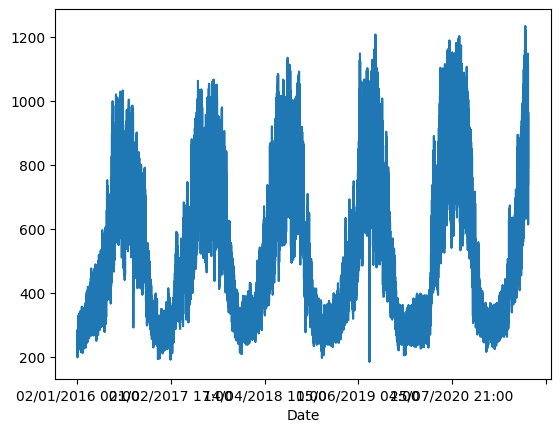

In [56]:
ax = df.Demand.plot()

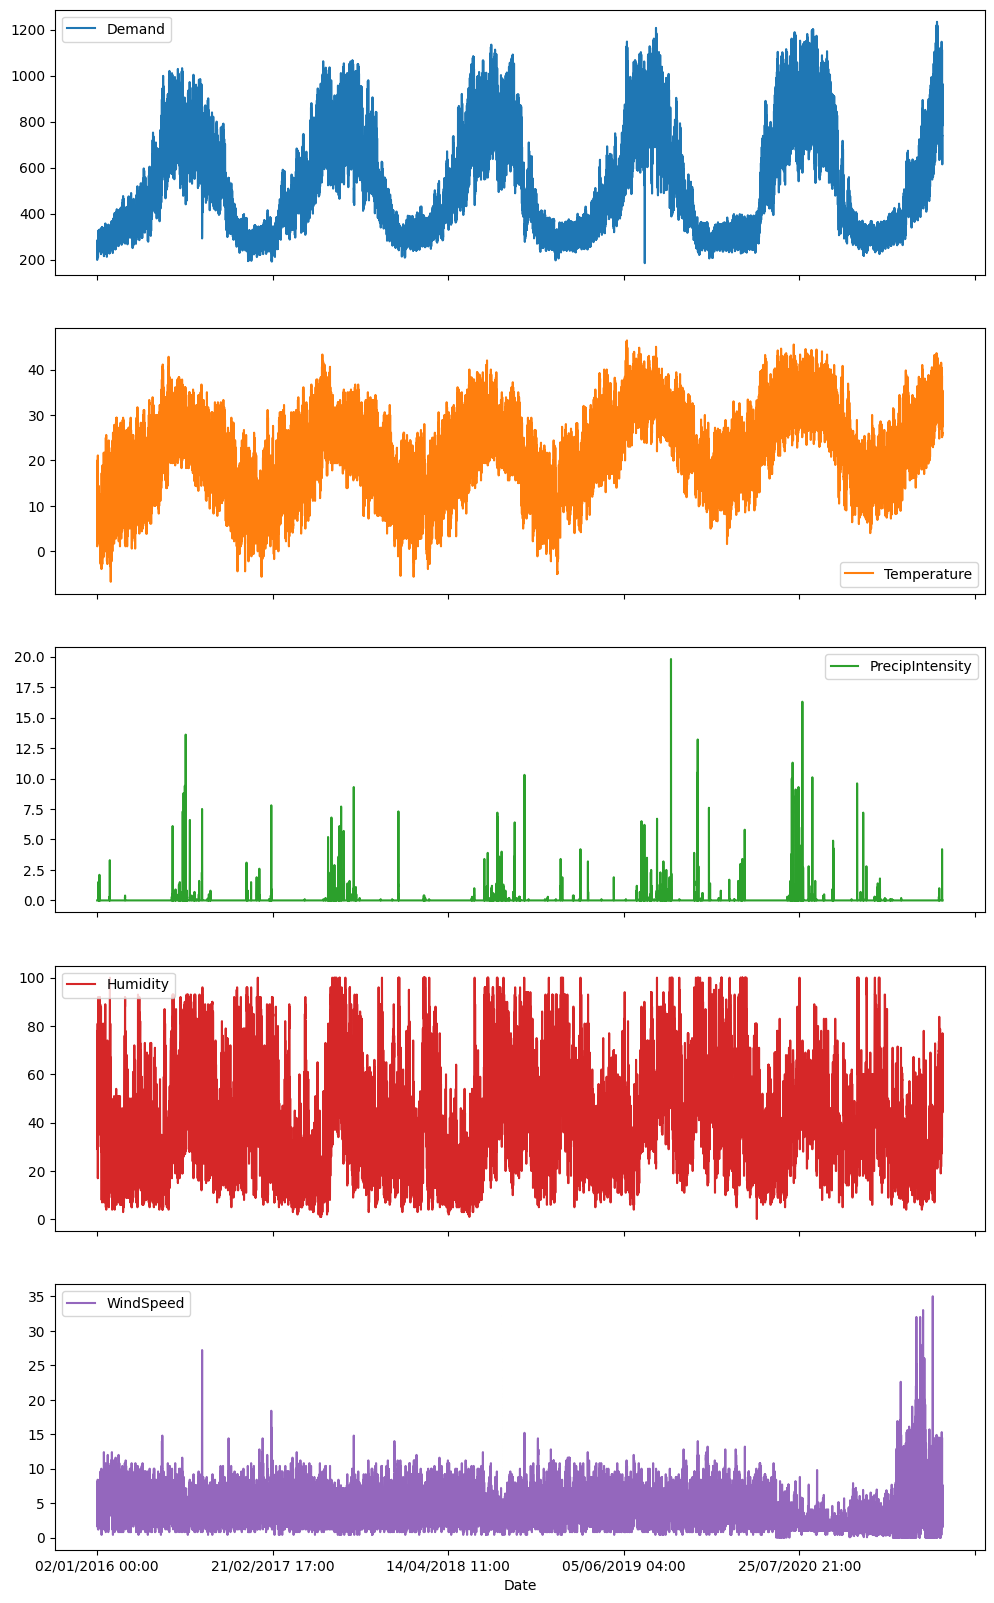

In [57]:
ax = df.plot(figsize=(12, 20), subplots=True)

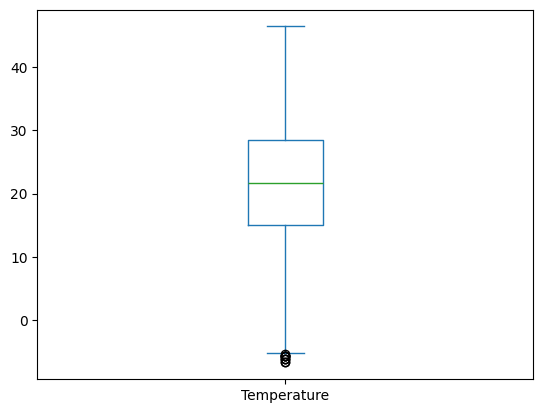

In [58]:
ax = df.Temperature.plot.box()

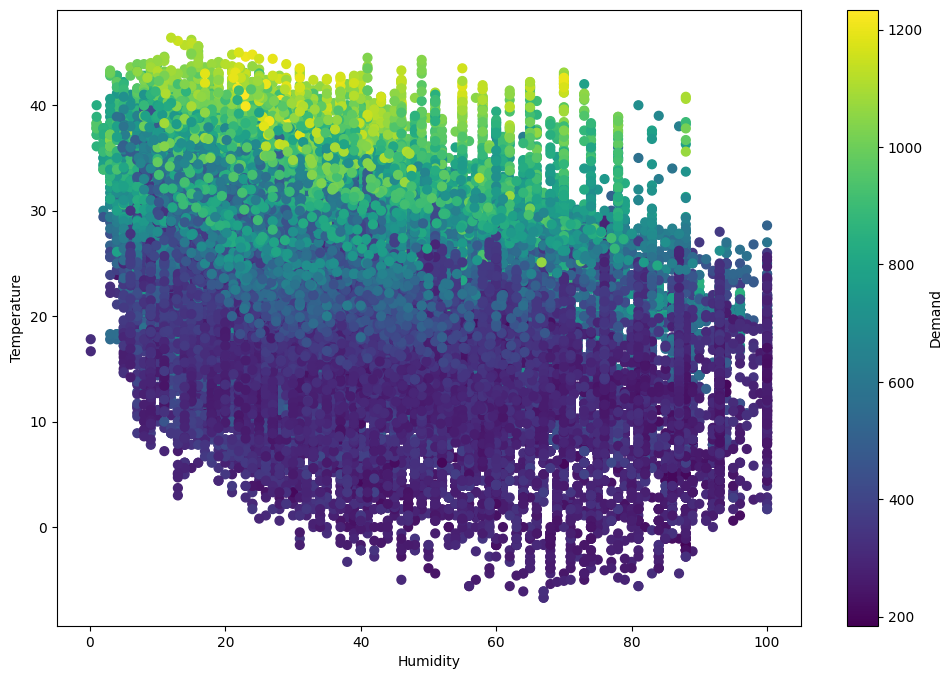

In [59]:
ax = df.plot.scatter(
    x='Humidity',
    y='Temperature',
    c='Demand',
    s =40,
    figsize=(12,8)
)

## Generando nuevas variables a partir de las variables conocidas

Generar nuevas variables es relativamente simple, pero hay algunas cosas que son diferentes con numpy y por las cuales hay que tener cuidado.

df['farenheit'] = (df.Temperature * 9/5) + 32

df['refri'] = 0
df['refri'] = df.refri.where(df.Temperature < 30, 1)

df['DiaSemana'] = df.index.weekday

df.rename(
    columns={
        'Demand': 'Demanda',
        'Temperature': 'Temperatura',
        'PrecipIntensity': 'Precipitación',
        'Humidity': 'Humedad',
        'WinSpeed': 'VelocidadViento',
    },
    inplace=True
)
df

## Analizando con regrupamientos

En particular, es interesante poder hacer algun análisis exploratorio utilizando las facilidades que da el uso del manejo de la información temporal que ofrece pandas. En espacial cuando se combina con `groupby` y diferentes funciones de agregación.

Vamos a empezar por ver la demanda promedio por día de la semana:

In [68]:
ax = df.groupby(df.index.month)[['Demanda']].boxplot(subplots=False, rot=90)

KeyError: "Columns not found: 'Demanda'"

KeyError: 'Column not found: Demanda'

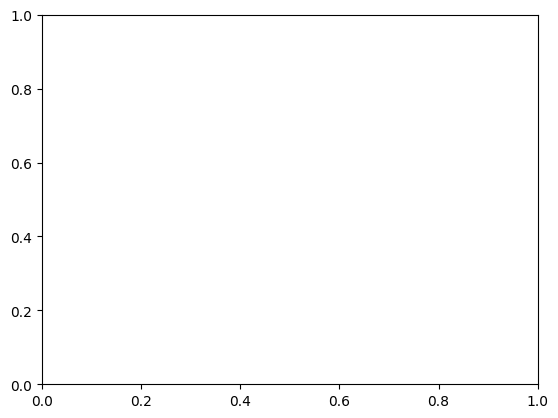

In [69]:
df.boxplot(column=['Demanda'], by=df.index.month)

In [70]:
df_semana = df.groupby('DiaSemana').agg(
    {
        'Demanda': ['min', 'max', 'mean', 'median', 'std'],
        'Precipitación': ['min', 'max']
    }
)
df_semana

KeyError: 'DiaSemana'

Ahora vamos a ver que pasa en forma mensual

In [71]:
ax = (
    df[['Demanda']]
    .groupby(df.index.month)
    .boxplot(subplots=False, rot=90, figsize=(12, 7))
)

KeyError: "None of [Index(['Demanda'], dtype='object')] are in the [columns]"

In [72]:
ax = (
    df[['Temperatura']]
    .groupby(df.index.month)
    .boxplot(
        subplots=False,
        rot=90,
        figsize=(12, 7)
    )
)

KeyError: "None of [Index(['Temperatura'], dtype='object')] are in the [columns]"

O inclusive por hora del día

In [73]:
ax = (
    df[['Demanda']]
    .groupby(df.index.hour)
    .boxplot(subplots=False, rot=90, figsize=(12, 7)
)

SyntaxError: incomplete input (ipython-input-1450661240.py, line 5)

In [74]:
df_hora = (
    df[['Demanda', 'Temperatura']]
    .groupby([df.index.hour, df.index.month_name()])
    .mean()
    .unstack()
)
df_hora

KeyError: "None of [Index(['Demanda', 'Temperatura'], dtype='object')] are in the [columns]"

In [ ]:
ax = df_hora.Demanda.plot(
    style='o',
    figsize=(15,7),
    title='Demanda por hora y por mes',
    xlabel='Hora',
    ylabel='Demanda'
)

In [ ]:
ax = df_hora.Temperatura.plot(
    style='o',
    figsize=(15,7))

## Generando nuevas variables a partir de las variables conocidas

Generar nuevas variables es relativamente simple, pero hay algunas cosas que son diferentes con numpy y por las cuales hay que tener cuidado.

### Vamos a practicar

Para esta practica vamos a usar un conjunto de datos de la revista *wine magazine*,
donde revisan una cantidad bastante sorprendente de vinos.

Una descripción de la base de datos la encuentras [aquí](https://www.kaggle.com/zynicide/wine-reviews).
Para no tener que descargar los datos a mano, se anexa la dirección `url` de donde se pueden descargar.

Es importante notr que la primer columna del archivo `csv` es el índice (usar `index_col=0` cuando se descargue el archivo con `pd.read_csv`).

Una vez descargado, usar pandas para las siguientes tareas:

1. ¿Cuantas variables tiene el dataframe? ¿Qué variables tienen valores perdidos? ¿Qué variables son numéricas? ¿Qué variables son cualitativas?
2. Hacer un dataframe con únicamente vinos europeos.
3. ¿Cuál es el menor, el mayor y el precio promedio de la botella por país? ¿De que país es la botella de menor precio?
4. ¿Cuantos vinos hay con *aroma a fresa* entre otras consideraciones snobs que vienen en la descripción?
5. ¿Cuantas designaciones diferentes hay? ¿Cuál es la más repetida? ¿Cuantas veces se repite?
6. Hacer un dataframe con la variedad, el país y el precio para vinos con un costo menor a los $20 dolares.
7. ¿Cuantos vinos diferentes de la variedad *Pinot Noir* hay por cada país?


In [90]:
winmag_url = 'https://gist.githubusercontent.com/clairehq/79acab35be50eaf1c383948ed3fd1129/raw/407a02139ae1e134992b90b4b2b8c329b3d73a6a/winemag-data-130k-v2.csv'

In [92]:
df_wine = pd.read_csv(winmag_url, index_col=0)

# ¿Cuántas variables tiene el dataframe?
print("Número de variables:", df_wine.shape[1])

# ¿Qué variables tienen valores perdidos?
print("Variables con valores perdidos:")
print(df_wine.columns[df_wine.isna().any()].tolist())

# ¿Qué variables son numéricas?
print("Variables numéricas:")
print(df_wine.select_dtypes(include='number').columns.tolist())

# ¿Qué variables son cualitativas?
print("Variables cualitativas:")
print(df_wine.select_dtypes(include='object').columns.tolist())

Número de variables: 13
Variables con valores perdidos:
['country', 'designation', 'price', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle']
Variables numéricas:
['points', 'price']
Variables cualitativas:
['country', 'description', 'designation', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title', 'variety', 'winery']


In [93]:

# Hacer un dataframe con únicamente vinos europeos.
paises_europa = [
    "France", "Italy", "Spain", "Portugal", "Germany",
    "Austria", "Greece", "Hungary", "Romania", "Bulgaria",
    "Croatia", "Slovenia", "Czech Republic", "Moldova",
    "England", "Switzerland", "Serbia", "Slovakia",
    "Ukraine", "Turkey"
]

# DataFrame solo con vinos europeos
df_europa = df_wine[df_wine["country"].isin(paises_europa)].copy()
print("Filas (vinos europeos):", df_europa.shape[0])
df_europa.head()

Filas (vinos europeos): 30890


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach


In [97]:
# ¿Cuál es el menor, el mayor y el precio promedio de la botella por país?
precios_por_pais = df_wine.groupby("country")["price"].agg(
    precio_minimo="min",
    precio_maximo="max",
    precio_promedio="mean"
)

print(precios_por_pais)

# ¿De que país es la botella de menor precio?
pais_mas_barato = df_wine.loc[df_wine["price"].idxmin(), "country"]
print("\nEl vino más barato es de:", pais_mas_barato)


                        precio_minimo  precio_maximo  precio_promedio
country                                                              
Argentina                         4.0          230.0        23.604663
Armenia                          14.0           14.0        14.000000
Australia                         6.0          850.0        35.786701
Austria                           7.0          150.0        30.846774
Bosnia and Herzegovina           13.0           13.0        13.000000
Brazil                           10.0           45.0        23.185185
Bulgaria                          8.0           55.0        14.014706
Canada                           12.0          120.0        35.575472
Chile                             5.0          400.0        21.021544
Croatia                          13.0           65.0        25.000000
Cyprus                           11.0           21.0        16.000000
Czech Republic                   15.0           45.0        23.666667
England             

In [98]:
# ¿Cuantos vinos hay con *aroma a fresa* entre otras consideraciones snobs que vienen en la descripción?
num_fresa = df_wine["description"].str.contains(
    "strawberry", case=False, na=False
).sum()

print("Número de vinos con aroma a fresa:", num_fresa)

Número de vinos con aroma a fresa: 2060


In [99]:
# Número de designaciones diferentes
num_designaciones = df_wine["designation"].nunique()

# Designación más repetida y cuántas veces aparece
designacion_mas_repetida = df_wine["designation"].value_counts().idxmax()
veces_repetida = df_wine["designation"].value_counts().max()

print("Número de designaciones diferentes:", num_designaciones)
print("Designación más repetida:", designacion_mas_repetida)
print("Número de repeticiones:", veces_repetida)

Número de designaciones diferentes: 24187
Designación más repetida: Reserve
Número de repeticiones: 999


In [100]:
# Hacer un dataframe con la variedad, el país y el precio para vinos con un costo menor a los $20 dolares
vinos_menor_20 = df_wine.loc[
    df_wine["price"] < 20,
    ["variety", "country", "price"]
]

print(vinos_menor_20.head())

              variety   country  price
1      Portuguese Red  Portugal   15.0
2          Pinot Gris        US   14.0
3            Riesling        US   13.0
5  Tempranillo-Merlot     Spain   15.0
6            Frappato     Italy   16.0


In [101]:
# ¿Cuantos vinos diferentes de la variedad *Pinot Noir* hay por cada país?
pinot_por_pais = (
    df_wine[df_wine["variety"] == "Pinot Noir"]
    .groupby("country")
    .size()
)

print(pinot_por_pais)

country
Argentina         46
Australia         58
Austria           51
Brazil             2
Bulgaria           9
Canada             8
Chile            184
Croatia            1
England            5
France          1001
Germany           31
Israel             5
Italy              4
New Zealand      281
Portugal           7
Romania            8
Slovenia           3
South Africa      21
Spain              6
Switzerland        2
US              4918
Uruguay            3
dtype: int64
